<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/cfg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebook for chapter 4
# (Context Free Languages)
# of the Computational Models and Formal Languages Book

<a href="https://samyzaf.com/afl.pdf">
<img src="https://samyzaf.com/afl/afl1.jpg" alt="CMFL book cover" width="40%"/>
</a>

* The purpose of this notebook is to allow students and
  readers of the CMFL book to conveniently simulate Context Free Grammars (CFG) on a Google Colab environment
  (without having to install anything on their
   computer or device).
* For that purpose we use basic Python packages such as the
  standard **nltk** package (natural languages tool kit)
* We only provide a few examples for how to use this package
  We will be glad to get feedback and additional code
  for solving other exercises from the book.

## Starting with the Python **nltk** package
* The following code block has to run first
* **nltk** - Natural Language Toolkit
* **nltk homepage:** https://www.nltk.org/
* The next cell loads the **nltk** package and defines several utilities which
  we need in this notebook.

In [ ]:
!pip install svgling
from nltk import CFG, ChartParser, Nonterminal
from nltk.parse.generate import generate
from random import random, sample, choice

# Several nltk utilities
def join(sentence, sep=' '):
    sent = sep.join(sentence)
    return sent

def split(sent, sep=' '):
    if sep == '':
        sentence = list(sent)
    else:
        sentence = sent.split(sep)
    return sentence

def random_sentence(grammar, symbol=None):
    if not symbol:
        symbol = grammar.start()
    sentence = []
    productions = grammar.productions(lhs = symbol)
    production = choice(productions)
    for sym in production.rhs():
        if isinstance(sym, str):
            sentence.append(sym)
        else:
            sentence.extend(random_sentence(grammar, sym))
    return sentence

def random_sentences(grammar, n=10):
    sentences = []
    for i in range(n):
        s = random_sentence(grammar)
        sentences.append(s)

    return sentences

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.0 MB/s eta 0:00:00


## Defining a Context Free Grammar (CFG)
* The **CFG** command creates a new **Context Free Grammar**
  by specifying its variable names, terminals, and productions.
* In most theoretical text books, a variable name is represented by a capital
  English letter such as A, B, C, ..., X, Y, Z.
  Terminals are presented by a lower case English letter such as a, b, c, ..., x, y, z.
* Sentences
* The following example is a typical.
* You may copy it and solve some of the exercises in the book.

* A simple sub grammar for arithmetical expressions
  as formally defined in classical textbooks:


$
\qquad
\newcommand{\imp}{\rightarrow}
\begin{array}{rcl}
S  & \imp &  S+S \\
S  & \imp &  S*S \\
S  & \imp &  (S) \\
S  & \imp &  a \\
S  & \imp &  b \\
S  & \imp &  c
\end{array}
$

* In the **nltk** Python package, grammar variable names are represented by simple
  Python names such as `start`, `statement`, `condition`, `float`, etc.
  Terminals are represented bby simple Python strings such as `a`, `b`, `x1`, `y12`, etc.

In [ ]:
cfg1 = CFG.fromstring("""
S  ->  S '+' S
S  ->  S '*' S
S  ->  '(' S ')'
S  ->  'a'
S  ->  'b'
S  ->  'c'
""")

In [ ]:
start = cfg1.start()
print(f"Start token = {start}")

Start token = S


In [ ]:
productions = cfg1.productions()
print("Productions:")
for p in productions:
    print(f"    {p}")

Productions:
    S -> S '+' S
    S -> S '*' S
    S -> '(' S ')'
    S -> 'a'
    S -> 'b'
    S -> 'c'


In [ ]:
sentence1 = ['a', '*', '(', 'b', '+', 'c', ')']
parser = ChartParser(cfg1)
trees1 = list(parser.parse(sentence1))

In [ ]:
print("This is how a sentence is represented in nltk:")
print(sentence1)
print("This is a friendlier presentation:")
print(join(sentence1))
print("This is a tighter presentation:")
join(sentence1, '')

This is how a sentence is represented in nltk:
['a', '*', '(', 'b', '+', 'c', ')']
This is a friendlier presentation:
a * ( b + c )
This is a tighter presentation:


'a*(b+c)'

In [ ]:
trees1

[Tree('S', [Tree('S', ['a']), '*', Tree('S', ['(', Tree('S', [Tree('S', ['b']), '+', Tree('S', ['c'])]), ')'])])]

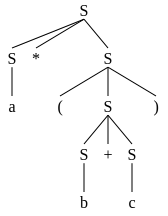

In [ ]:
trees1[0]

In [ ]:
len(trees1)

1

In [ ]:
len(list(generate(cfg1, depth=5)))

2781264

* There are 2781264 sentence of depth 5 (or less) in the grammar **cfg1**.
* Lets take a random sample of 20 sentences from this grammar to see how they look like

In [ ]:
sentences = random_sentences(cfg1, n=20)

In [ ]:
for i,sent in enumerate(sentences):
    print(f"{i+1}. {sent}")

1. ['c']
2. ['b']
3. ['b']
4. ['(', '(', 'c', ')', ')']
5. ['c', '*', 'b']
6. ['(', 'c', ')', '+', 'c', '+', 'c', '*', '(', 'b', ')', '+', 'c', '*', 'a', '+', 'a']
7. ['(', '(', 'b', '*', 'b', '*', 'c', '+', 'a', '+', 'a', '*', 'b', ')', ')', '*', '(', '(', 'c', ')', ')']
8. ['(', 'a', ')']
9. ['a', '*', 'b']
10. ['a']
11. ['(', 'a', ')']
12. ['c']
13. ['b']
14. ['(', 'b', ')', '+', 'c', '*', '(', 'b', '*', '(', 'a', '+', 'a', '*', 'c', '*', 'c', '+', 'c', ')', '*', 'b', ')']
15. ['(', 'c', ')']
16. ['c', '+', 'c']
17. ['a']
18. ['(', '(', 'c', ')', ')']
19. ['b', '*', 'a']
20. ['b']


* A better view of these sentence is obtained by the **join** method:

In [ ]:
for i,sent in enumerate(sentences):
    print(f"{i+1}. {join(sent, '')}")

1. c
2. b
3. b
4. ((c))
5. c*b
6. (c)+c+c*(b)+c*a+a
7. ((b*b*c+a+a*b))*((c))
8. (a)
9. a*b
10. a
11. (a)
12. c
13. b
14. (b)+c*(b*(a+a*c*c+c)*b)
15. (c)
16. c+c
17. a
18. ((c))
19. b*a
20. b


## Examples of sentences in the grammar cfg1
* Lets pick a few examples of sentences in the grammar **cfg1**
  and use them to display a few concepts of context free grammar theory.
* We will start with the concept of a **Parse Tree**

In [ ]:
sentence1 = split("a * ( b + c ) + b * a * a", ' ')
sentence2 = split("c + b + b + c * b * c + a", ' ')
sentence3 = split("a + b * a + b + ( c * c )", ' ')

In [ ]:
sentence2

['c', '+', 'b', '+', 'b', '+', 'c', '*', 'b', '*', 'c', '+', 'a']

## Parse Trees
* Lets take some of the sentences that we generated and display their parse tree
* Note that for ambiguous grammar, a sentence may have more than one parse tree!

In [ ]:
parser = ChartParser(cfg1)
trees = list(parser.parse(sentence2))
print(f"Number of parse trees: {len(trees)}")

Number of parse trees: 132


* Display parse tree 0:

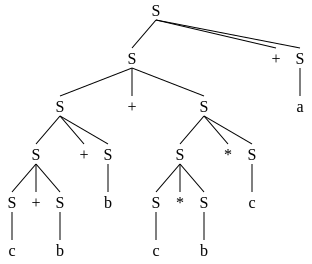

In [ ]:
join(sent)
trees[0]

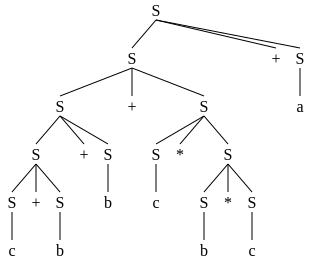

In [ ]:
join(sent)
trees[1]

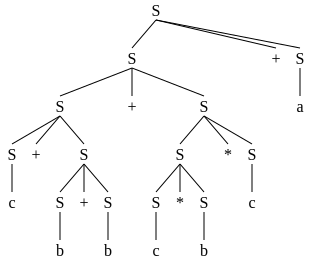

In [ ]:
join(sent)
trees[2]

In [ ]:
cfg2 = CFG.fromstring("""
statement -> 'if' condition 'then' sentence | sentence
sentence -> 'if' condition 'then' sentence 'else' statement | claim
condition -> 'a1' | 'a2' | 'a3'
claim -> 'b1' | 'b2' | 'b3'
""")


In [ ]:
start = cfg1.start()
print(f"Start token = {start}")

Start token = S


In [ ]:
cfg2._rhs_index

{'if': [statement -> 'if' condition 'then' sentence,
  sentence -> 'if' condition 'then' sentence 'else' statement],
 sentence: [statement -> sentence],
 claim: [sentence -> claim],
 'a1': [condition -> 'a1'],
 'a2': [condition -> 'a2'],
 'a3': [condition -> 'a3'],
 'b1': [claim -> 'b1'],
 'b2': [claim -> 'b2'],
 'b3': [claim -> 'b3']}

In [ ]:
productions = cfg1.productions()
print("Productions:")
for p in productions:
    print(f"    {p}")

Productions:
    S -> S '+' S
    S -> S '*' S
    S -> '(' S ')'
    S -> 'a'
    S -> 'b'
    S -> 'c'


In [ ]:
sentence1 = ['if', 'a1', 'then', 'b1']
sentence2 = ['if', 'a3', 'then', 'if', 'a2', 'then', 'b2', 'else', 'b3']
parser = ChartParser(cfg2)
trees1 = list(parser.parse(sentence1))
trees2 = list(parser.parse(sentence2))

In [ ]:
trees1

[Tree('statement', ['if', Tree('condition', ['a1']), 'then', Tree('sentence', [Tree('claim', ['b1'])])])]

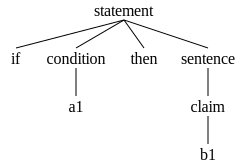

In [ ]:
trees1[0]

In [ ]:
trees2

[Tree('statement', ['if', Tree('condition', ['a3']), 'then', Tree('sentence', ['if', Tree('condition', ['a2']), 'then', Tree('sentence', [Tree('claim', ['b2'])]), 'else', Tree('statement', [Tree('sentence', [Tree('claim', ['b3'])])])])])]

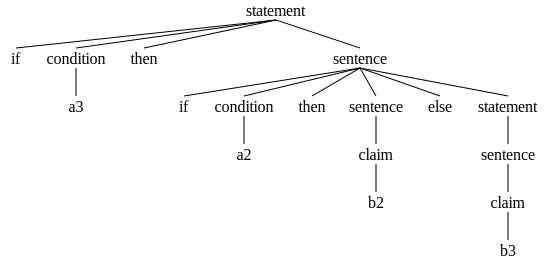

In [ ]:
trees2[0]

In [ ]:
len(trees2)

1

## Example of a grammar for a simple subset of English

In [ ]:
grammar = CFG.fromstring("""
sentence  ->  "Be" trait "." | sentence "," command
command  ->  "Be" trait | "be" trait
trait -> "bold" | "courageous" | "your best"
""")

## Exercise 4.1
Convert the following grammar to Chomsky Normal Form

$
\qquad
\begin{array}{rcl}
S   & \rightarrow & SAS|A|\varepsilon \\
A   & \rightarrow & 00|\varepsilon
\end{array}
$

In [ ]:
cfg = CFG.fromstring("""
S  ->  S A S | A | ''
A  ->  '00' | ''
""")

In [ ]:
cnf = cfg.chomsky_normal_form()

In [ ]:
cnf.productions()

[S0_SIGMA -> '',
 A -> '00',
 S@$@S -> A S,
 A -> '',
 S -> S S@$@S,
 S0_SIGMA -> S S@$@S,
 S -> '00',
 S0_SIGMA -> '00',
 S -> '']

In [ ]:
sentences = random_sentences(cfg, n=20)

In [ ]:
for i,sent in enumerate(sentences):
    print(f"{i+1}. {join(sent,'')}")

1. 00
2. 
3. 
4. 
5. 
6. 00000000
7. 
8. 00
9. 
10. 
11. 
12. 
13. 
14. 
15. 
16. 00
17. 0000
18. 
19. 000000
20. 0000


In [ ]:
cnf = cfg.chomsky_normal_form()

In [ ]:
for p in cnf.productions():
    print(p)

S -> ''
S0_SIGMA -> S S@$@S
S0_SIGMA -> ''
A -> ''
S -> S S@$@S
S0_SIGMA -> '00'
A -> '00'
S -> '00'
S@$@S -> A S


In [ ]:
cnf2 = CFG.fromstring("""
S -> S C
A -> ''
B -> ''
B -> '00'
B -> S C
S -> ''
C -> A S
S -> '00'
A -> '00'
""")

In [ ]:
sentences = random_sentences(cnf2, n=20)

In [ ]:
for i,sent in enumerate(sentences):
    print(f"{i+1}. {join(sent,'')}")

1. 00
2. 
3. 00
4. 
5. 00
6. 
7. 
8. 000000000000
9. 
10. 
11. 00
12. 0000000000
13. 
14. 
15. 00
16. 
17. 00
18. 00
19. 000000000000000000000000000000
20. 


In [ ]:
sentences = sample(list(generate(cfg2, depth=6)), 10)

In [ ]:
for s in sentences:
    print(join(s))

if a1 then if a2 then b3 else if a3 then b2
if a3 then if a2 then b3 else if a1 then b3
if a1 then if a2 then b2 else b1
if a1 then if a2 then b3 else if a3 then b1
if a2 then if a1 then b2 else if a2 then b3
if a3 then b1 else b2
if a2 then if a2 then b1 else b2
if a3 then if a2 then b3 else if a3 then b3
if a2 then b2 else b2
if a3 then if a3 then b2 else if a1 then b3


## Exercise 4.11: C Floating-Point Constants

* A "floating-point constant" is a decimal number that represents a **signed real number**.

* The representation of a signed real number includes an integer portion, a fractional portion,
  an optional exponent, and an optional signifier (f,F,l,L).
  
* Examples:  
  1708, -1708.0, 1.708e3, +1.708E3, 1708f, 1708F,  
  0.1708e4, .1708E4, 1708.F, 1708.f, .1708e4F,  1708000e-3F,
  1708L, 1708l, -1.78e3L, +1708.L, -.0170800e5L, 17080000.0e-4l, ...
  
### Specification


````
floating-point-constant:
   fractional-constant exponent-part[opt] floating-suffix[opt]
   digit-sequence exponent-part floating-suffix[opt]

fractional-constant:
   digit-sequence[opt] . digit-sequence
   digit-sequence .

exponent-part:
   e sign[opt] digit-sequence
   E sign[opt] digit-sequence

sign: one of
   + -

digit-sequence:
   digit
   digit-sequence digit

floating-suffix: one of
   f l F L
````

* Your mission in this exercise is to construct a **context free grammar** for the language of
  C Floating-Point Constants.

* For more details see:  
https://learn.microsoft.com/en-us/cpp/c-language/c-floating-point-constants?view=msvc-170&viewFallbackFrom=vs-2019#syntax

In [ ]:
float_grammar = CFG.fromstring("""
float -> frac | frac exp int | frac suffix | frac exp int suffix
frac -> int '.' | int '.' digseq
int -> digseq | sign digseq
digseq -> digit | digit digseq
digit -> '0' | '1' | '2' | '3' | '4' | '5' | '6' | '7' | '8' | '9'
sign -> '+' | '-'
exp -> 'e' | 'E'
suffix -> 'f' | 'F' | 'l' | 'L'
""")

In [ ]:
for sent in random_sentences(float_grammar, n=30):
    print(join(sent, ''))

1.
+6.f
3.6e19l
4.L
0.71f
-1.f
+74.6e+9f
6.7F
+845.e493F
611.e9706L
090.7E+2
-88.6
267.82e+13729963
31.6e-189
71.866E7
-3.e-475
+98.2
-5.3e4f
+4527.e+81
32.586526l
-43.E+08
560.4
-94047.562e-7l
+18789614.l
7.E939F
-0.3
60948.l
-4.f
8630.5f
12.f


In [ ]:
sentence = list("+478.0675e35F")
parser = ChartParser(float_grammar)
trees = list(parser.parse(sentence))

In [ ]:
len(trees)

1

* Only one parse tree, so it looks like this is a non-ambiguous grammar
* (But this requires a formal proof!)
* Lets see how this tree looks like ..

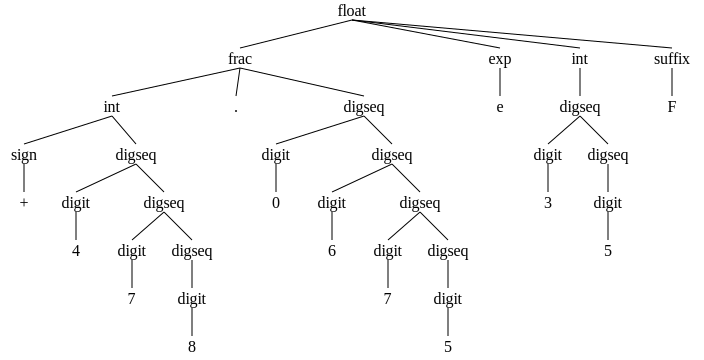

In [ ]:
trees[0]

## Exercise 4.34

In [ ]:
grammar = CFG.fromstring("""
statement  ->  'if' condition 'then' sentence | sentence
sentence  ->  'if' condition 'then' sentence 'else' statement | result
condition -> 'c1' | 'c2' | 'c3'
result  ->  'r1' | 'r2' | 'r3'
""")

In [ ]:
for sent in random_sentences(grammar, n=5):
    print(join(sent))

if c3 then if c3 then if c1 then r3 else if c1 then if c2 then if c2 then if c1 then if c3 then r2 else if c3 then if c3 then r2 else if c3 then if c3 then r1 else if c2 then if c3 then r2 else if c1 then r3 else r1 else if c1 then r1 else if c1 then if c3 then r3 else if c3 then r3 else if c3 then r3 else if c2 then r3 else if c1 then if c2 then r3 else if c1 then r2 else r2 else if c3 then if c1 then if c1 then if c3 then r3 else if c1 then r3 else if c3 then r3 else r2 else if c1 then r1 else r2 else r1
r3
if c2 then r1
r2
if c2 then if c1 then r3 else if c3 then if c3 then if c1 then r1 else if c2 then if c3 then r2 else if c3 then r1 else if c1 then r3 else r2 else r3 else if c2 then r1


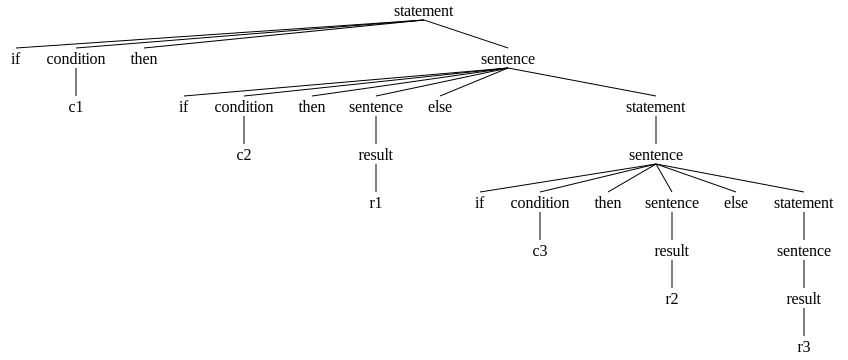

In [ ]:
sent = "if c1 then if c2 then r1 else if c3 then r2 else r3"
parser = ChartParser(grammar)
trees = list(parser.parse(sent.split()))
trees[0]

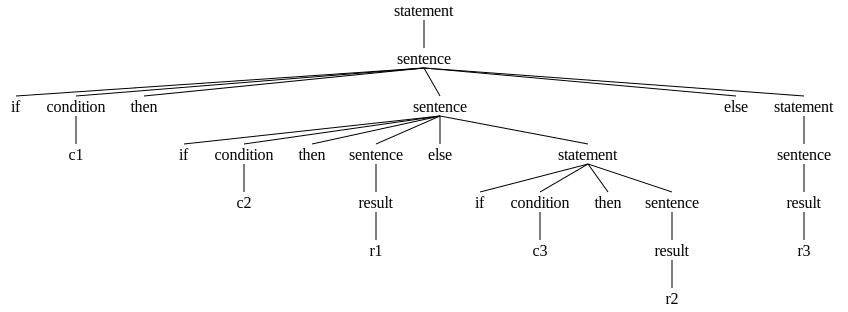

In [ ]:
trees[1]